In [81]:
from PIL import Image
from glob import glob
import numpy as np
from tensorflow import keras
from tensorflow.python.training import saver
import matplotlib.pyplot as plt
from keras.layers import *
from tqdm import tqdm

Créer des fonctions d'ensemble de formation

In [53]:
def createTrain(path):
    # test_path = "./resource/Test/"
    nub_train = len(glob(path + '/*/*.jpg'))
    #先生成空array，然后往里填每张图片的array
    x_train = np.zeros((nub_train, 600, 360, 3), dtype=np.uint8)
    y_train = np.zeros((nub_train,), dtype=np.uint8)

    i = 0
    for img_path in tqdm(glob(path + '/*/*.jpg')):
        img = Image.open(img_path)
        img = img.resize((360, 600))  #图片resize
        arr = np.asarray(img)  #图片转array
        x_train[i, :, :, :] = arr  #赋值
        typeName = img_path.split('/')[-2]
        # typeName = "castanea"
        if typeName == 'amborella':
            y_train[i] = 0
        elif typeName == 'castanea':
            y_train[i] = 1
        elif typeName == 'convolvulaceae':
            y_train[i] = 2
        elif typeName == 'desmodium':
            y_train[i] = 3
        elif typeName == 'eugenia':
            y_train[i] = 4
        elif typeName == 'laurus':
            y_train[i] = 5
        elif typeName == 'litsea':
            y_train[i] = 6
        elif typeName == 'magnolia':
            y_train[i] = 7
        elif typeName == 'monimiaceae':
            y_train[i] = 8
        elif typeName == 'rubus':
            y_train[i] = 9
        elif typeName == 'ulmus':
            y_train[i] = 10
        i += 1
    return x_train, y_train

Création d'un ensemble d'entraînement

In [54]:
train_path = "./resource/TrainMasked/"
x_train, y_train = createTrain(train_path)

100%|██████████| 221/221 [00:49<00:00,  4.46it/s]


In [55]:
# train_path2 = "./resource/TrainMasked2/"
# x_train2, y_train2 = createTrain(train_path2)

In [56]:
# train_path3 = "./resource/TrainMasked3/"
# x_train3, y_train3 = createTrain(train_path3)

Montrez 16 images de l'ensemble d'entraînement et assurez-vous que les données d'entrée sont correctes.

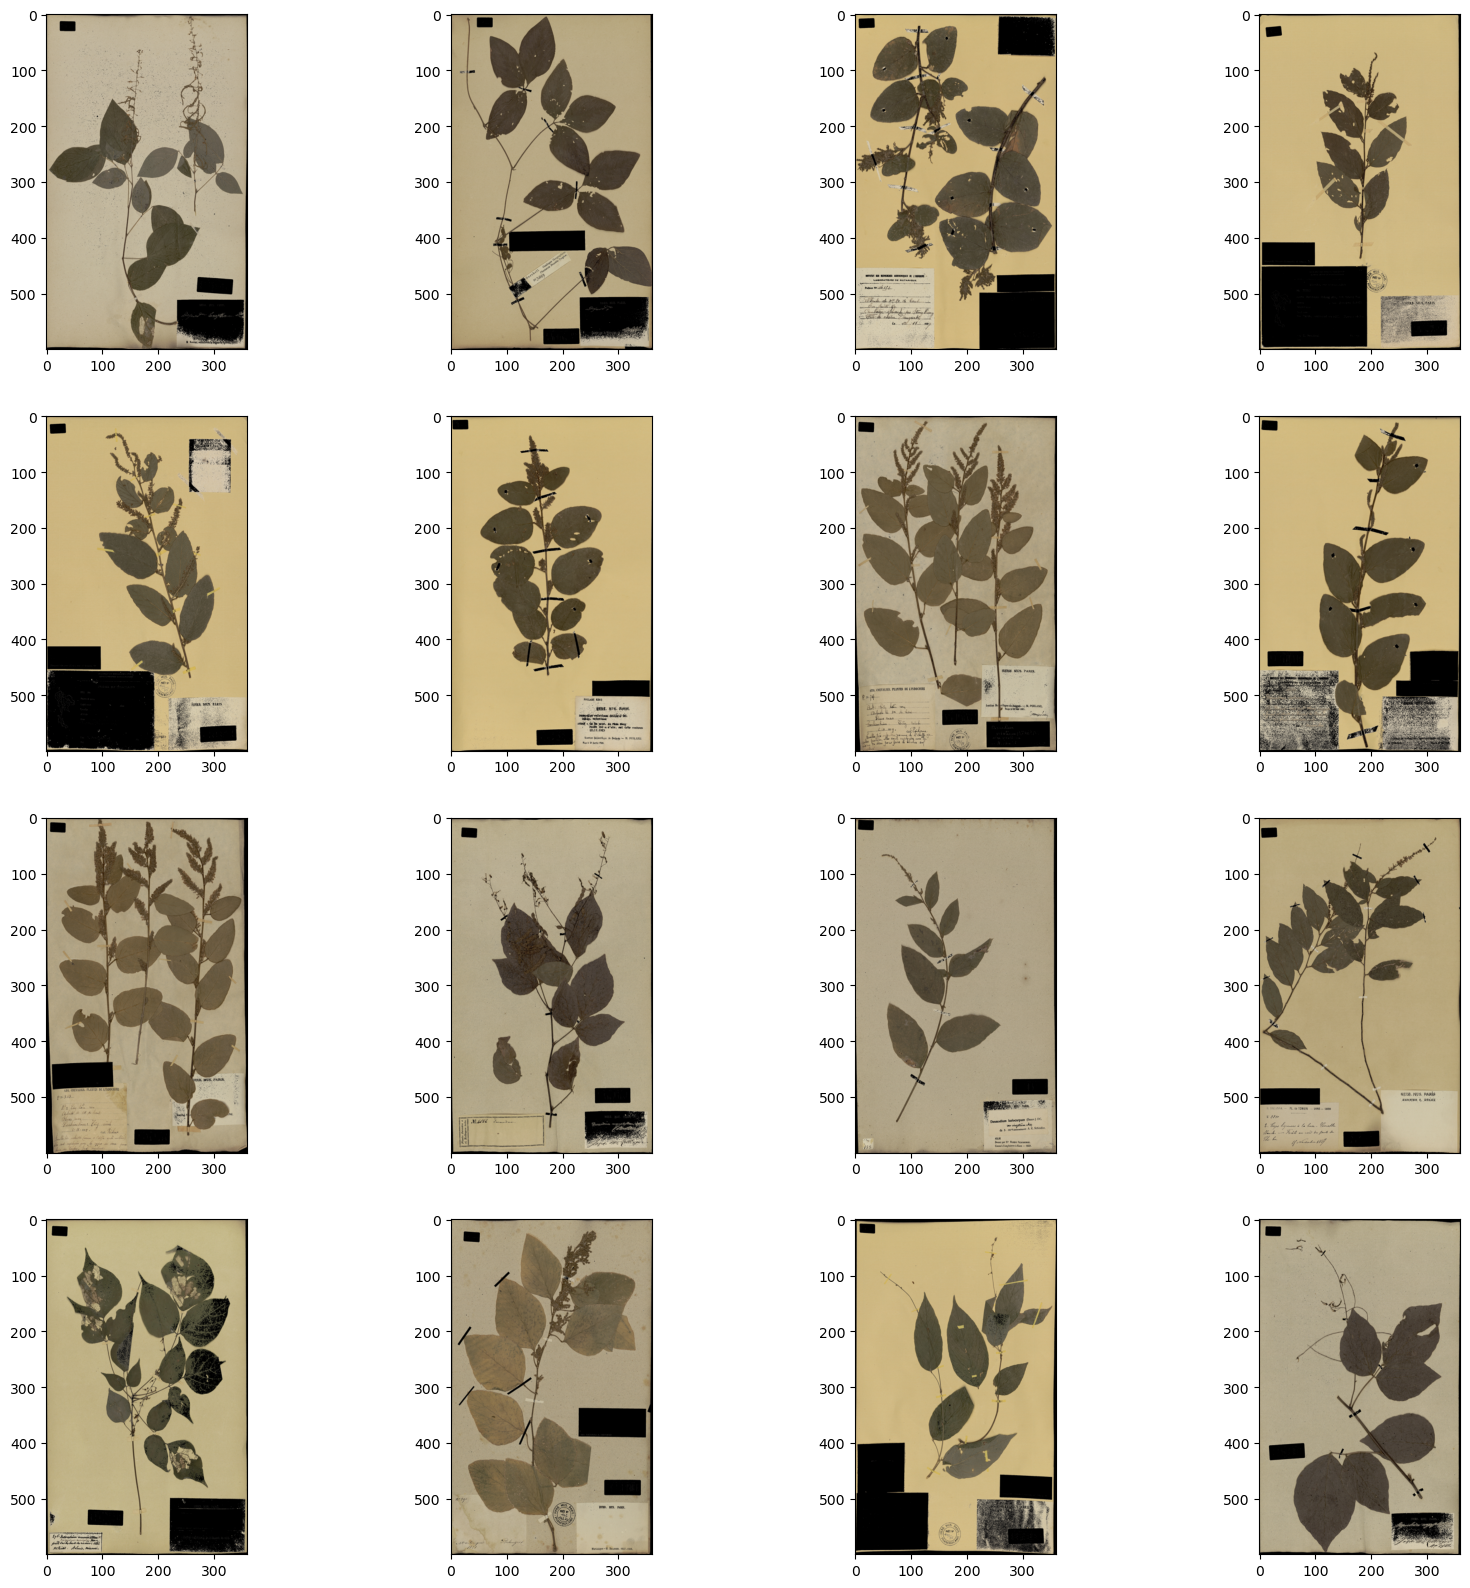

In [80]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

j = 0
for i, img in enumerate(x_train[:16]):
    axes[i // 4, j % 4].imshow(img)
    j += 1

Construire le modèle, qui est séquentiel, avec une couche d'entrée, deux couches cachées et une couche de sortie, en utilisant l'optimiseur Adam.

In [75]:
# Build model
model = keras.Sequential()

model.add(Flatten(input_shape=[600, 360, 3]))  # input layer
model.add(Dense(32, activation='relu')),  # hidden layer
model.add(Dense(32, activation='relu')),  # hidden layer
model.add(Dense(11, activation='softmax'))  # output layer

model.compile(optimizer=keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              )


Commencez à former le modèle

In [76]:
# Train model
model.fit(x_train, y_train, epochs=100, shuffle=True)

Epoch 1/100


2022-12-04 12:35:13.127625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 2s 273ms/step - loss: 19870.5762 - accuracy: 0.0543
Epoch 2/100
7/7 [==============================] - 2s 268ms/step - loss: 11420.4492 - accuracy: 0.1267
Epoch 3/100
7/7 [==============================] - 2s 268ms/step - loss: 9057.5557 - accuracy: 0.1086
Epoch 4/100
7/7 [==============================] - 2s 267ms/step - loss: 7252.3394 - accuracy: 0.1267
Epoch 5/100
7/7 [==============================] - 2s 267ms/step - loss: 4669.6191 - accuracy: 0.1493
Epoch 6/100
7/7 [==============================] - 2s 269ms/step - loss: 3776.6899 - accuracy: 0.1493
Epoch 7/100
7/7 [==============================] - 2s 265ms/step - loss: 2927.8914 - accuracy: 0.1991
Epoch 8/100
7/7 [==============================] - 2s 267ms/step - loss: 2084.2571 - accuracy: 0.2353
Epoch 9/100
7/7 [==============================] - 2s 266ms/step - loss: 1769.7197 - accuracy: 0.2443
Epoch 10/100
7/7 [==============================] - 2s 266ms/step - loss: 1932.7227 - accura

Créer des fonctions d'ensemble de test

In [60]:
def createTest(path):
    # test_path = "./resource/Test/"
    nub_test = len(glob(path + '/*/*.jpg'))
    #先生成空array，然后往里填每张图片的array
    x_test = np.zeros((nub_test, 600, 360, 3), dtype=np.uint8)
    y_test = np.zeros((nub_test,), dtype=np.uint8)

    j = 0
    for img_path in tqdm(glob(path + '/*/*.jpg')):
        img = Image.open(img_path)
        img = img.resize((360, 600))  #图片resize
        arr = np.asarray(img)  #图片转array
        x_test[j, :, :, :] = arr  #赋值
        typeName = img_path.split('/')[-2]
        # typeName = "castanea"
        if typeName == 'amborella':
            y_test[j] = 0
        elif typeName == 'castanea':
            y_test[j] = 1
        elif typeName == 'convolvulaceae':
            y_test[j] = 2
        elif typeName == 'desmodium':
            y_test[j] = 3
        elif typeName == 'eugenia':
            y_test[j] = 4
        elif typeName == 'laurus':
            y_test[j] = 5
        elif typeName == 'litsea':
            y_test[j] = 6
        elif typeName == 'magnolia':
            y_test[j] = 7
        elif typeName == 'monimiaceae':
            y_test[j] = 8
        elif typeName == 'rubus':
            y_test[j] = 9
        elif typeName == 'ulmus':
            y_test[j] = 10
        j += 1
    return x_test, y_test

Création d'ensembles de tests

In [61]:
x_test, y_test = createTest("./resource/TestMasked/")

100%|██████████| 112/112 [00:25<00:00,  4.45it/s]


In [62]:
# x_test2, y_test2 = createTest("./resource/TestMasked2/")

In [63]:
# x_test3, y_test3 = createTest("./resource/TestMasked3/")

Évaluer l'exactitude du modèle

In [78]:
# Evaluate model
valid_loss, valid_acc = model.evaluate(x_test, y_test, verbose=1)
print(f"Valid loss:{valid_loss}")
print(f"Valid accuracy:{valid_acc}")

2022-12-04 12:39:03.967220: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 238ms/step - loss: 3151.5364 - accuracy: 0.1964
Valid loss:3151.536376953125
Valid accuracy:0.196428582072258


Préservation des modèles

In [77]:
# 模型保存，注意：仅仅是多了一个save_format的参数而已
# 注意：这里的'path_to_saved_model'不再是模型名称，仅仅是一个文件夹，模型会保存在这个文件夹之下
model.save('saved_model', save_format='tf')

INFO:tensorflow:Assets written to: saved_model/assets


Modèles de chargement

In [66]:
# 加载模型，通过指定存放模型的文件夹来加载
# model = keras.models.load_model('saved_model')

Modèles d'affichage

In [67]:
# 看到模型的结构
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 648000)            0         
                                                                 
 dense_24 (Dense)            (None, 32)                20736032  
                                                                 
 dense_25 (Dense)            (None, 32)                1056      
                                                                 
 dense_26 (Dense)            (None, 11)                363       
                                                                 
Total params: 20,737,451
Trainable params: 20,737,451
Non-trainable params: 0
_________________________________________________________________


In [68]:
print(y_test)

[ 3  3  3  3  3  3  3  3  5  5  5  5  5  5  5  5  5  5  8  8  8  8  8  8
  8  8  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  4  4  4  4  4  4  4  4  4  4  9  9  9  9  9  9  9
  9  9  9 10 10 10 10 10 10 10 10 10 10  0  0  0  0  0  0  0  0  0  6  6
  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7]


In [69]:
print(x_test.shape)

(112, 600, 360, 3)


Faire des prédictions de modèle

In [79]:
# Make one prediction
# x_test,y_test = createTest("./resource/TestMasked/")
# print(y_test)
class_names = ['amborella', 'castanea', 'convolvulaceae', 'desmodium', 'eugenia', 'laurus', 'litsea', 'magnolia',
               'monimiaceae', 'rubus', 'ulmus']
# class_names = ['amborella', 'castanea', 'eugenia']
y_predicts = model.predict(x_test)

for i in range(0, 29):
    y_index = np.argmax(y_predicts[i])
    y_label = class_names[y_index]
    print("Number ", i, " is: ", y_label)

1/4 [======>.......................] - ETA: 0s

2022-12-04 12:40:25.862169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 254ms/step
Number  0  is:  ulmus
Number  1  is:  litsea
Number  2  is:  desmodium
Number  3  is:  litsea
Number  4  is:  litsea
Number  5  is:  litsea
Number  6  is:  rubus
Number  7  is:  litsea
Number  8  is:  litsea
Number  9  is:  laurus
Number  10  is:  litsea
Number  11  is:  desmodium
Number  12  is:  amborella
Number  13  is:  litsea
Number  14  is:  laurus
Number  15  is:  litsea
Number  16  is:  litsea
Number  17  is:  litsea
Number  18  is:  litsea
Number  19  is:  litsea
Number  20  is:  desmodium
Number  21  is:  litsea
Number  22  is:  litsea
Number  23  is:  eugenia
Number  24  is:  litsea
Number  25  is:  litsea
Number  26  is:  convolvulaceae
Number  27  is:  convolvulaceae
Number  28  is:  convolvulaceae
